In [115]:
#coding=utf-8
import json
import geopandas
import matplotlib.pyplot as plt
import requests
import pandas as pd
import time
import os
import numpy as np
import matplotlib as mpl
import seaborn as sns
import json
import geopandas
import matplotlib.pyplot as plt
import requests
from shapely.geometry import LineString
import time
import os

In [116]:
import os
filePath = '/Users/jackyanghc/Desktop/Jupyter/'
filename = []
for i,j,k in os.walk(filePath):
    for m in j:
        if m[0] == 'S':
            filename.append(m)

ShangHai = geopandas.read_file(filePath+filename[0],encoding='utf-8')
for i in range(1,len(filename)):
    tmp = geopandas.read_file(filePath+filename[i],encoding='utf-8')
    ShangHai = pd.concat([ShangHai,tmp])

print(ShangHai)

         name            Timestamp  \
0       申嘉湖高速  2019_11_22 12:02:00   
1       申嘉湖高速  2019_11_22 12:02:00   
2      上海绕城高速  2019_11_22 12:02:00   
3      上海绕城高速  2019_11_22 12:02:00   
4       ３２４省道  2019_11_22 12:02:00   
...       ...                  ...   
92128     华申路  2019_11_21 12:00:00   
92129     华申路  2019_11_21 12:00:00   
92130    五洲大道  2019_11_21 12:00:00   
92131     申江路  2019_11_21 12:00:00   
92132     东靖路  2019_11_21 12:00:00   

                                                   Lcode  speed Congestion  \
0      4054,4056,4061,4063,4604,4066,4069,4070,4072,4...     95          1   
1      -4084,-4083,-4079,-4078,-4076,-4072,-4070,-406...     95          1   
2      2011,2010,2009,2008,2007,2006,2005,2392,2001,2...     74          1   
3      -1994,-1995,-1996,-1998,-2000,-2001,-2392,-200...     80          1   
4      4096,4098,4106,4107,4110,4116,4127,4128,4129,4...     45          1   
...                                                  ...    ...        ... 

In [117]:
ShangHai = ShangHai.drop_duplicates(
    subset = ['Lcode'],
    keep='first',
    inplace=False)
ShangHai = ShangHai.reset_index(drop=True)
ShangHai

,name,Timestamp,Lcode,speed,Congestion,lenght,geometry
0,申嘉湖高速,2019_11_22 12:02:00,"4054,4056,4061,4063,4604,4066,4069,4070,4072,4...",95,1,0.827757,"LINESTRING (120.99678 30.94682, 120.99790 30.9..."
1,申嘉湖高速,2019_11_22 12:02:00,"-4084,-4083,-4079,-4078,-4076,-4072,-4070,-406...",95,1,0.827588,"LINESTRING (121.79185 31.09912, 121.78603 31.0..."
2,上海绕城高速,2019_11_22 12:02:00,"2011,2010,2009,2008,2007,2006,2005,2392,2001,2...",74,1,0.815770,"LINESTRING (121.21579 30.88882, 121.21603 30.8..."
3,上海绕城高速,2019_11_22 12:02:00,"-1994,-1995,-1996,-1998,-2000,-2001,-2392,-200...",80,1,0.622420,"LINESTRING (121.29923 31.37005, 121.29452 31.3..."
4,３２４省道,2019_11_22 12:02:00,"4096,4098,4106,4107,4110,4116,4127,4128,4129,4...",45,1,0.784077,"LINESTRING (121.13834 30.93422, 121.14327 30.9..."
...,...,...,...,...,...,...,...
11635,龙华东路,2019_11_21 11:46:00,-5595,25,1,0.009922,"LINESTRING (121.49202 31.19752, 121.49154 31.1..."
11636,外环高速,2019_11_21 11:48:00,"-72,-70,-68,-67,-106,-105,-104,-103,-102,-101,...",65,1,0.352618,"LINESTRING (121.36338 31.30586, 121.36327 31.3..."
11637,三林路,2019_11_21 11:52:00,-4362,25,2,0.004240,"LINESTRING (121.52306 31.14653, 121.52281 31.1..."
11638,三林路,2019_11_21 11:52:00,-1615,35,1,0.008203,"LINESTRING (121.53095 31.14880, 121.52988 31.1..."


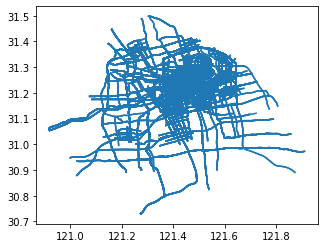

In [118]:
ShangHai.plot()

In [119]:
Roads = geopandas.GeoDataFrame()
all_Roads = ShangHai[['name','Lcode','lenght',"geometry"]]

In [120]:
for i in range(len(all_Roads)):
    if len(all_Roads.loc[i]["Lcode"].split(',')) == 1:
        Roads = Roads.append(all_Roads.loc[i])
    else:
        continue

In [121]:
Roads = Roads.drop_duplicates(
    subset=[ 'Lcode'],
    keep='first',
    inplace=False)
Roads = Roads.reset_index(drop=True)
Roads

,Lcode,geometry,lenght,name
0,6003,"LINESTRING (121.17384 31.08366, 121.17381 31.0...",0.025335,千新公路
1,-6002,"LINESTRING (121.17207 31.10885, 121.17293 31.1...",0.025334,千新公路
2,-6005,"LINESTRING (121.17616 31.10835, 121.17623 31.1...",0.045975,外青松公路
3,6005,"LINESTRING (121.21242 31.08734, 121.21114 31.0...",0.001284,外青松公路
4,-5977,"LINESTRING (121.23105 31.20410, 121.23148 31.2...",0.007630,新凤南路
...,...,...,...,...
4171,-5470,"LINESTRING (121.49580 31.20303, 121.49566 31.2...",0.002716,半淞园路
4172,-5596,"LINESTRING (121.49223 31.19769, 121.49202 31.1...",0.000271,龙华东路
4173,-5595,"LINESTRING (121.49202 31.19752, 121.49154 31.1...",0.009922,龙华东路
4174,-4362,"LINESTRING (121.52306 31.14653, 121.52281 31.1...",0.004240,三林路


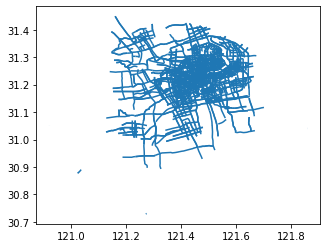

In [122]:
Roads.plot()

In [123]:
Lcodes = ShangHai['Lcode']
Code_list = []

for i in range(len(Lcodes)):
    s = Lcodes[i].split(',')
    for j in s:
        Code_list.append(j)
set_code = set(Code_list)
print(len(set_code))

6016


In [28]:
# 是否有相反的值
for i in set_code:
    for j in set_code:
        if int(i)+int(j)==0:
            print("woo!",i,j)

woo! -5824 5824
woo! -279 279
woo! 2300 -2300
woo! 1239 -1239
woo! -5182 5182
woo! -1367 1367
woo! -5638 5638
woo! 2591 -2591
woo! 1674 -1674
woo! 3040 -3040
woo! -2172 2172
woo! -1575 1575
woo! 2681 -2681
woo! 265 -265
woo! 5189 -5189
woo! 1081 -1081
woo! 4376 -4376
woo! -1719 1719
woo! -1071 1071
woo! 5550 -5550
woo! 1643 -1643
woo! 1057 -1057
woo! -4409 4409
woo! 360 -360
woo! -353 353
woo! 608 -608
woo! 4352 -4352
woo! -579 579
woo! -3922 3922
woo! 5994 -5994
woo! 4493 -4493
woo! -4449 4449
woo! -809 809
woo! 2050 -2050
woo! 1090 -1090
woo! 4311 -4311
woo! -4224 4224
woo! 2212 -2212
woo! 1127 -1127
woo! 1165 -1165
woo! -3309 3309
woo! -6031 6031
woo! 651 -651
woo! 718 -718
woo! 3001 -3001
woo! 3240 -3240
woo! 4787 -4787
woo! 68 -68
woo! -2120 2120
woo! -4536 4536
woo! -5923 5923
woo! 2567 -2567
woo! 4610 -4610
woo! -137 137
woo! -6105 6105
woo! 5118 -5118
woo! 4379 -4379
woo! -2239 2239
woo! -2347 2347
woo! -1471 1471
woo! 816 -816
woo! 4257 -4257
woo! 1990 -1990
woo! 6105 -6105
wo

woo! -1260 1260
woo! 5638 -5638
woo! -5996 5996
woo! -4028 4028
woo! 516 -516
woo! -3038 3038
woo! -4306 4306
woo! -1517 1517
woo! -696 696
woo! -1990 1990
woo! -795 795
woo! -4663 4663
woo! 2167 -2167
woo! -1238 1238
woo! 5590 -5590
woo! 4026 -4026
woo! 4243 -4243
woo! -5125 5125
woo! -3983 3983
woo! 5639 -5639
woo! -168 168
woo! -4421 4421
woo! 5765 -5765
woo! -6026 6026
woo! -5758 5758
woo! 5188 -5188
woo! 514 -514
woo! 4812 -4812
woo! 1914 -1914
woo! 450 -450
woo! 1553 -1553
woo! -1554 1554
woo! -1171 1171
woo! -74 74
woo! 6011 -6011
woo! 428 -428
woo! 1264 -1264
woo! -3195 3195
woo! -4377 4377
woo! 4014 -4014
woo! -1625 1625
woo! -983 983
woo! -5066 5066
woo! -5581 5581
woo! 2123 -2123
woo! -3201 3201
woo! -113 113
woo! -3016 3016
woo! 4775 -4775
woo! 597 -597
woo! 5564 -5564
woo! 1624 -1624
woo! 4703 -4703
woo! 1051 -1051
woo! 1053 -1053
woo! 2479 -2479
woo! -2790 2790
woo! -4209 4209
woo! -6168 6168
woo! -2037 2037
woo! 5628 -5628
woo! -2040 2040
woo! 4399 -4399
woo! -4612 4612


woo! 1431 -1431
woo! 1924 -1924
woo! -70 70
woo! -5014 5014
woo! -3379 3379
woo! -5589 5589
woo! -588 588
woo! 104 -104
woo! -1768 1768
woo! 1449 -1449
woo! 3787 -3787
woo! -3980 3980
woo! 2525 -2525
woo! 77 -77
woo! 5645 -5645
woo! -1280 1280
woo! -4675 4675
woo! 3880 -3880
woo! 799 -799
woo! -3863 3863
woo! 1959 -1959
woo! -4084 4084
woo! -6214 6214
woo! 1314 -1314
woo! 4272 -4272
woo! 2347 -2347
woo! -4779 4779
woo! 684 -684
woo! 1533 -1533
woo! 4550 -4550
woo! 2096 -2096
woo! -568 568
woo! 503 -503
woo! -4708 4708
woo! 5101 -5101
woo! -4367 4367
woo! -602 602
woo! -3471 3471
woo! -1136 1136
woo! -1290 1290
woo! 2331 -2331
woo! 1668 -1668
woo! 1355 -1355
woo! -2228 2228
woo! 4554 -4554
woo! 5580 -5580
woo! -1545 1545
woo! 2948 -2948
woo! -996 996
woo! 5624 -5624
woo! -4773 4773
woo! 2078 -2078
woo! -5831 5831
woo! 2621 -2621
woo! 4510 -4510
woo! -130 130
woo! 5149 -5149
woo! 4360 -4360
woo! 6120 -6120
woo! 4779 -4779
woo! -4516 4516
woo! -2893 2893
woo! -974 974
woo! -936 936
woo! -

woo! 4061 -4061
woo! 2207 -2207
woo! -5797 5797
woo! 5093 -5093
woo! -5837 5837
woo! 810 -810
woo! 6155 -6155
woo! 79 -79
woo! -5109 5109
woo! 2462 -2462
woo! -4400 4400
woo! 1939 -1939
woo! -989 989
woo! 1832 -1832
woo! -5074 5074
woo! -4165 4165
woo! 546 -546
woo! 819 -819
woo! -5911 5911
woo! -1905 1905
woo! 95 -95
woo! -4699 4699
woo! 2131 -2131
woo! -690 690
woo! 1288 -1288
woo! 1022 -1022
woo! 6088 -6088
woo! -2212 2212
woo! -2503 2503
woo! 4617 -4617
woo! -3194 3194
woo! 743 -743
woo! 3905 -3905
woo! -6209 6209
woo! 1630 -1630
woo! 4997 -4997
woo! 1693 -1693
woo! 4876 -4876
woo! 1401 -1401
woo! 1399 -1399
woo! 1554 -1554
woo! -2529 2529
woo! 1241 -1241
woo! 4098 -4098
woo! 1663 -1663
woo! -3780 3780
woo! 2919 -2919
woo! -2628 2628
woo! -503 503
woo! -627 627
woo! -2449 2449
woo! 679 -679
woo! -5543 5543
woo! 3190 -3190
woo! -3048 3048
woo! 1985 -1985
woo! 3103 -3103
woo! 2319 -2319
woo! 2104 -2104
woo! -4018 4018
woo! 4537 -4537
woo! 1136 -1136
woo! -5926 5926
woo! 6027 -6027
wo

woo! 2554 -2554
woo! 4661 -4661
woo! -710 710
woo! 4412 -4412
woo! 3321 -3321
woo! -609 609
woo! 964 -964
woo! -827 827
woo! -2080 2080
woo! 6154 -6154
woo! -1168 1168
woo! 2426 -2426
woo! -6198 6198
woo! 3038 -3038
woo! -4450 4450
woo! 4413 -4413
woo! -2550 2550
woo! -948 948
woo! 5948 -5948
woo! -1641 1641
woo! 4167 -4167
woo! 1205 -1205
woo! 1189 -1189
woo! -4124 4124
woo! 4594 -4594
woo! 75 -75
woo! 1968 -1968
woo! 169 -169
woo! -1738 1738
woo! 3310 -3310
woo! -5548 5548
woo! -4701 4701
woo! 4131 -4131
woo! -5119 5119
woo! 1764 -1764
woo! 474 -474
woo! -5508 5508
woo! 3412 -3412
woo! -1927 1927
woo! 2282 -2282
woo! 795 -795
woo! -1713 1713
woo! 1765 -1765
woo! 4024 -4024
woo! -2373 2373
woo! 3774 -3774
woo! -4080 4080
woo! -872 872
woo! -3335 3335
woo! 2540 -2540
woo! 6085 -6085
woo! -5569 5569
woo! -5765 5765
woo! 2137 -2137
woo! -6036 6036
woo! -5156 5156
woo! 1897 -1897
woo! -2086 2086
woo! 188 -188
woo! -1817 1817
woo! -3931 3931
woo! 1418 -1418
woo! 4007 -4007
woo! 5027 -5027


woo! 121 -121
woo! 5774 -5774
woo! 1094 -1094
woo! -3908 3908
woo! -1590 1590
woo! -4528 4528
woo! -2877 2877
woo! -811 811
woo! 3800 -3800
woo! -1798 1798
woo! 6158 -6158
woo! -6032 6032
woo! 5805 -5805
woo! -1647 1647
woo! -5533 5533
woo! 2680 -2680
woo! 5562 -5562
woo! -3516 3516
woo! 2419 -2419
woo! 4844 -4844
woo! -5688 5688
woo! -2001 2001
woo! -3130 3130
woo! -5971 5971
woo! -616 616
woo! -4349 4349
woo! -4741 4741
woo! 4790 -4790
woo! 1312 -1312
woo! 101 -101
woo! -1841 1841
woo! -686 686
woo! -4259 4259
woo! 59 -59
woo! -6153 6153
woo! 4580 -4580
woo! -4880 4880
woo! -4790 4790
woo! -4982 4982
woo! -5585 5585
woo! 4397 -4397
woo! 1372 -1372
woo! 978 -978
woo! -261 261
woo! -6199 6199
woo! -2680 2680
woo! 5585 -5585
woo! -1922 1922
woo! -4076 4076
woo! 2791 -2791
woo! 602 -602
woo! -4478 4478
woo! -2482 2482
woo! 3863 -3863
woo! -1241 1241
woo! -1917 1917
woo! 1354 -1354
woo! 2155 -2155
woo! -4223 4223
woo! 1732 -1732
woo! -1722 1722
woo! 5211 -5211
woo! 5599 -5599
woo! -5028 5

woo! -4222 4222
woo! -4690 4690
woo! -540 540
woo! -4859 4859
woo! 5500 -5500
woo! 1882 -1882
woo! 672 -672
woo! -1533 1533
woo! -1907 1907
woo! 1854 -1854
woo! 5907 -5907
woo! -3541 3541
woo! 1250 -1250
woo! 5521 -5521
woo! 1652 -1652
woo! 2544 -2544
woo! 3356 -3356
woo! 1621 -1621
woo! 451 -451
woo! 5818 -5818
woo! -2439 2439
woo! 3414 -3414
woo! -2651 2651
woo! -1980 1980
woo! 1813 -1813
woo! 2363 -2363
woo! 483 -483
woo! -5910 5910
woo! -720 720
woo! -5830 5830
woo! 1867 -1867
woo! 3674 -3674
woo! -2527 2527
woo! -1268 1268
woo! -41 41
woo! 160 -160
woo! -90 90
woo! 1714 -1714
woo! 4942 -4942
woo! -5055 5055
woo! -1750 1750
woo! -986 986
woo! 1238 -1238
woo! -4828 4828
woo! -1921 1921
woo! -1741 1741
woo! -1492 1492
woo! 5592 -5592
woo! 5686 -5686
woo! 2124 -2124
woo! 4461 -4461
woo! 5183 -5183
woo! -34 34
woo! -1918 1918
woo! -4186 4186
woo! -4618 4618
woo! -2039 2039
woo! -4537 4537
woo! -671 671
woo! -492 492
woo! -2492 2492
woo! -5678 5678
woo! -5064 5064
woo! 1324 -1324
woo! 5

woo! -2993 2993
woo! -1786 1786
woo! 45 -45
woo! 5028 -5028
woo! 5043 -5043
woo! 2168 -2168
woo! -4601 4601
woo! -674 674
woo! 3959 -3959
woo! 6229 -6229
woo! -2383 2383
woo! -566 566
woo! -2417 2417
woo! 4170 -4170
woo! -1081 1081
woo! 2745 -2745
woo! 3584 -3584
woo! 1874 -1874
woo! -5211 5211
woo! -2540 2540
woo! 5542 -5542
woo! -3774 3774
woo! 3148 -3148
woo! -2332 2332
woo! -912 912
woo! 6042 -6042
woo! 4558 -4558
woo! -4737 4737
woo! 1246 -1246
woo! -706 706
woo! 3521 -3521
woo! 3141 -3141
woo! 1153 -1153
woo! 2740 -2740
woo! -1240 1240
woo! 3054 -3054
woo! 4668 -4668
woo! -2098 2098
woo! -1720 1720
woo! -50 50
woo! 2819 -2819
woo! 5842 -5842
woo! -5818 5818
woo! -2157 2157
woo! -1358 1358
woo! 2774 -2774
woo! -816 816
woo! 65 -65
woo! 4825 -4825
woo! -536 536
woo! 787 -787
woo! 2756 -2756
woo! 4961 -4961
woo! -4216 4216
woo! -4379 4379
woo! -1989 1989
woo! -670 670
woo! 1495 -1495
woo! 4351 -4351
woo! 2277 -2277
woo! -351 351
woo! 5131 -5131
woo! -2224 2224
woo! 3737 -3737
woo! 1

woo! -921 921
woo! 2245 -2245
woo! -3415 3415
woo! 2206 -2206
woo! 6149 -6149
woo! -1931 1931
woo! -4316 4316
woo! -1072 1072
woo! -6134 6134
woo! -5788 5788
woo! -2537 2537
woo! -1332 1332
woo! 1972 -1972
woo! -3191 3191
woo! -4834 4834
woo! -914 914
woo! -1855 1855
woo! 4700 -4700
woo! -514 514
woo! 5575 -5575
woo! -5989 5989
woo! -4908 4908
woo! 1927 -1927
woo! 2202 -2202
woo! 2003 -2003
woo! -1040 1040
woo! 2097 -2097
woo! -2008 2008
woo! 349 -349
woo! 4553 -4553
woo! -4757 4757
woo! -4395 4395
woo! 3144 -3144
woo! -519 519
woo! -4167 4167
woo! 4696 -4696
woo! -1958 1958
woo! 3541 -3541
woo! -5651 5651
woo! -4006 4006
woo! 448 -448
woo! 1661 -1661
woo! 6161 -6161
woo! -4507 4507
woo! 5524 -5524
woo! -5782 5782
woo! -2800 2800
woo! 5684 -5684
woo! 3052 -3052
woo! -978 978
woo! 103 -103
woo! 1331 -1331
woo! -440 440
woo! -537 537
woo! 2838 -2838
woo! -151 151
woo! -4629 4629
woo! 1037 -1037
woo! -2621 2621
woo! 1397 -1397
woo! -4340 4340
woo! 66 -66
woo! 6083 -6083
woo! 4551 -4551
wo

In [124]:
for i in range(len(Roads)):
    tmp = Roads.loc[i]
    if str(int(tmp.loc['Lcode']) * -1) in set_code:
        tmp.loc['Lcode'] = str(int(tmp.loc['Lcode']) * -1)
        Roads = Roads.append(tmp)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [125]:
Roads = Roads.drop_duplicates(
    subset=[ 'Lcode'],
    keep='first',
    inplace=False)
Roads = Roads.reset_index(drop=True)
Roads

,Lcode,geometry,lenght,name
0,6003,"LINESTRING (121.17384 31.08366, 121.17381 31.0...",0.025335,千新公路
1,-6002,"LINESTRING (121.17207 31.10885, 121.17293 31.1...",0.025334,千新公路
2,-6005,"LINESTRING (121.17616 31.10835, 121.17623 31.1...",0.045975,外青松公路
3,6005,"LINESTRING (121.21242 31.08734, 121.21114 31.0...",0.001284,外青松公路
4,-5977,"LINESTRING (121.23105 31.20410, 121.23148 31.2...",0.007630,新凤南路
...,...,...,...,...
5161,4668,"LINESTRING (121.48241 31.19613, 121.48180 31.1...",0.004148,龙华东路
5162,-5656,"LINESTRING (121.22665 31.35505, 121.22942 31.3...",0.011409,叶城路
5163,1056,"LINESTRING (121.53368 31.17820, 121.53344 31.1...",0.011755,成山路
5164,1071,"LINESTRING (121.53575 31.15598, 121.53638 31.1...",0.006069,浦三路


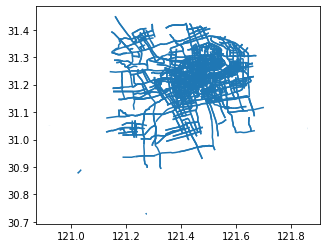

In [126]:
Roads.plot()

In [132]:
all_code = Roads['Lcode'].values.tolist()

for i in range(len(all_Roads)):
    s = all_Roads.loc[i]["Lcode"].split(',')
    lens = len(s)
    if lens == 2:
        for j in range(0,2):
            number = all_code.count(s[j])
#             print(number,i)
            if number == 1:
                tmp = all_Roads.loc[[i]]
#                 print(tmp)
                tmp2 = Roads[Roads['Lcode'] == s[j]]
                tmp2['Lcode'] = s[(j+1)%2]
                for m in tmp2['geometry'].values:
                    q = list(m.coords)
                for k in tmp['geometry'].values:
                    p = list(k.coords)
                ret = []
                for h in p:
                    if h not in q:
                        ret.append(h)
                try:
                    lines = LineString(ret)
                    tmp2['lenght'] = (tmp['lenght'].values - tmp2['lenght'].values)[0]
                    tmp2['geometry'] = lines
                    Roads = Roads.append(tmp2)
                    break;
                except:
                    break;
#                 tmp['geometry'] = tmp['geometry'] - tmp2['geometry']
    else:
        continue

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pand

In [133]:
Roads = Roads.drop_duplicates(
    subset=[ 'Lcode'],
    keep='first',
    inplace=False)
Roads = Roads.reset_index(drop=True)
Roads

,Lcode,geometry,lenght,name
0,6003,"LINESTRING (121.17384 31.08366, 121.17381 31.0...",0.025335,千新公路
1,-6002,"LINESTRING (121.17207 31.10885, 121.17293 31.1...",0.025334,千新公路
2,-6005,"LINESTRING (121.17616 31.10835, 121.17623 31.1...",0.045975,外青松公路
3,6005,"LINESTRING (121.21242 31.08734, 121.21114 31.0...",0.001284,外青松公路
4,-5977,"LINESTRING (121.23105 31.20410, 121.23148 31.2...",0.007630,新凤南路
...,...,...,...,...
5412,1295,"LINESTRING (121.58328 31.23157, 121.58312 31.2...",0.003143,云山路
5413,-6159,"LINESTRING (121.66649 31.21636, 121.66627 31.2...",0.013064,高科东路
5414,-1353,"LINESTRING (121.53978 31.16507, 121.53921 31.1...",0.008597,高青路
5415,4524,"LINESTRING (121.30487 31.19869, 121.30434 31.2...",0.009871,华翔路


In [129]:
all_code = Roads['Lcode'].values.tolist()

for i in range(len(all_Roads)):
    s = all_Roads.loc[i]["Lcode"].split(',')
    lens = len(s)
    if lens == 3:
        number = []
        print(s)
        for j in range(0,3):
            number.append(all_code.count(s[j]))
        print(number)
        if sum(number) == 2:
            ss = number.index(0)
            s1 = (ss+1)%3
            s2 = (ss+2)%3
            tmp = all_Roads.loc[[i]]
            print(tmp)
            tmp1 = Roads[Roads['Lcode'] == s[s1]]
            print(tmp1)
            tmp2 = Roads[Roads['Lcode'] == s[s2]]
            print(tmp2)
            
            for m in tmp2['geometry'].values:
                q = list(m.coords)
            for c in tmp1['geometry'].values:
                qq = list(m.coords)
            for k in tmp['geometry'].values:
                p = list(k.coords)
            ret = []
            for h in p:
                if h not in q:
                    if h not in qq:
                        ret.append(h)
            try:
                lines = LineString(ret)
                tmp2['lcode']=s[ss]
                tmp2['lenght'] = (tmp['lenght'].values - tmp2['lenght'].values - tmp3['lenght'].values)[0]
                tmp2['geometry'] = lines
                Roads = Roads.append(tmp2)
                print('success')
                break;
            except:
                break;
#                 tmp['geometry'] = tmp['geometry'] - tmp2['geometry']
    else:
        continue

['6220', '6221', '6222']
[1, 1, 1]
['5989', '5990', '5991']
[1, 1, 1]
['-5990', '-5989', '-5988']
[1, 1, 1]
['-5888', '-5887', '-5886']
[1, 1, 1]
['5774', '5775', '5776']
[1, 1, 1]
['-5892', '-5891', '-5890']
[1, 1, 1]
['5842', '5843', '5844']
[1, 1, 1]
['5782', '5783', '5784']
[1, 1, 1]
['-4589', '-4588', '-4587']
[1, 1, 0]
      name              Lcode    lenght  \
108  崧泽高架路  -4589,-4588,-4587  0.048059   

                                              geometry  
108  LINESTRING (121.32285 31.19625, 121.32275 31.1...  
      Lcode                                           geometry   lenght   name
4628  -4589  LINESTRING (121.30908 31.19866, 121.31020 31.1...  0.00813  崧泽高架路
      Lcode                                           geometry    lenght  \
4627  -4588  LINESTRING (121.28436 31.18927, 121.28651 31.1...  0.026466   

       name  
4627  崧泽高架路  


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [134]:
Roads = Roads.drop_duplicates(
    subset=[ 'Lcode'],
    keep='first',
    inplace=False)
Roads = Roads.reset_index(drop=True)
Roads

,Lcode,geometry,lenght,name
0,6003,"LINESTRING (121.17384 31.08366, 121.17381 31.0...",0.025335,千新公路
1,-6002,"LINESTRING (121.17207 31.10885, 121.17293 31.1...",0.025334,千新公路
2,-6005,"LINESTRING (121.17616 31.10835, 121.17623 31.1...",0.045975,外青松公路
3,6005,"LINESTRING (121.21242 31.08734, 121.21114 31.0...",0.001284,外青松公路
4,-5977,"LINESTRING (121.23105 31.20410, 121.23148 31.2...",0.007630,新凤南路
...,...,...,...,...
5412,1295,"LINESTRING (121.58328 31.23157, 121.58312 31.2...",0.003143,云山路
5413,-6159,"LINESTRING (121.66649 31.21636, 121.66627 31.2...",0.013064,高科东路
5414,-1353,"LINESTRING (121.53978 31.16507, 121.53921 31.1...",0.008597,高青路
5415,4524,"LINESTRING (121.30487 31.19869, 121.30434 31.2...",0.009871,华翔路


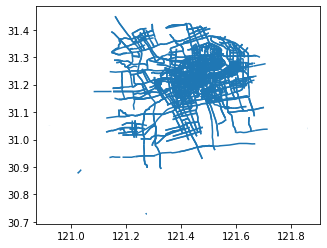

In [135]:
Roads.plot()

In [136]:
def save_to_file(data):
    datas = geopandas.GeoDataFrame(data)
    datas.to_file("Information_Of_Road",encoding='utf-8')

In [137]:
save_to_file(Roads)

In [138]:
Lcodes = ShangHai['Lcode']
Code_list = []

for i in range(len(Lcodes)):
    s = Lcodes[i].split(',')
    for j in s:
        Code_list.append(j)
set_code = set(Code_list)
print(len(set_code))

6016


In [139]:
Lcodes1 = Roads['Lcode']
Code_list1 = []
for i in range(len(Lcodes1)):
    s = Lcodes1[i].split(',')
    for j in s:
        Code_list1.append(j)
set_code2 = set(Code_list1)
print(len(set_code2))

5417


In [141]:
for i in set_code2:
    if i not in set_code:
        print('1')